Aluno: Bruno Santos (bfss@cesar.school)

# Import do dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import IsolationForest
from scipy.cluster.hierarchy import dendrogram, linkage, single, average, fcluster
from sklearn.cluster import KMeans, DBSCAN
import math
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/devjaynemorais/modelos_descritivos_curso/main/Aula%2005/dados/credit_card.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


# Tratamento de dados

In [ ]:
# Verificando a existência de valores nulos
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


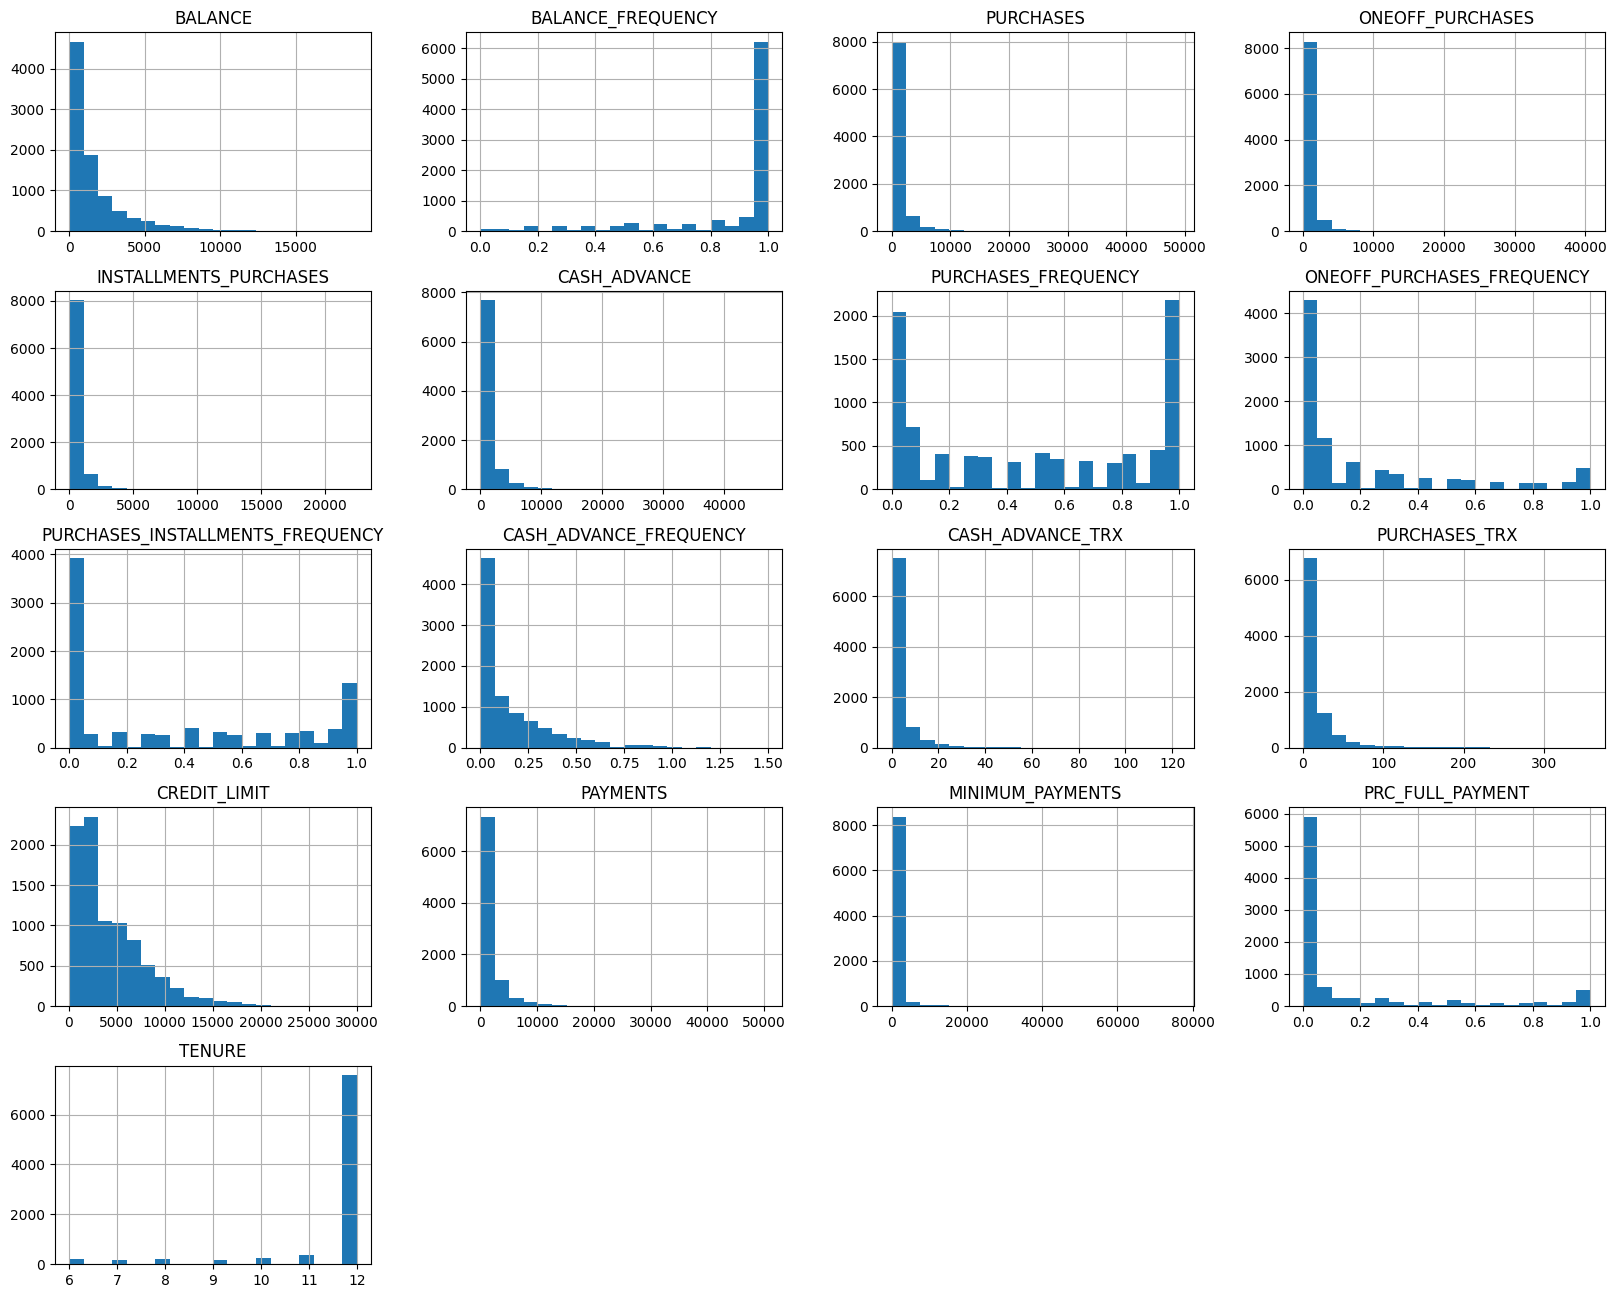

In [ ]:
# Histogramas de cada coluna
df.hist(figsize=(20, 16), bins=20)
plt.show()

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# Preenchendo valores ausentes com a mediana
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

# Verificando novamente para garantir que não há mais valores ausentes
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


## Normalização

In [ ]:
# Normalização dos dados
# Separando as colunas que vamos normalizar
columns_to_scale = df.columns.difference(['CUST_ID'])

# Inicializando o StandardScaler
scaler = StandardScaler()

# Aplicando a normalização
df_normalized = scaler.fit_transform(df[columns_to_scale])

# Convertendo de volta para DataFrame
df_normalized = pd.DataFrame(df_normalized, columns=columns_to_scale)

# Mantendo a coluna CUST_ID
df_normalized['CUST_ID'] = df['CUST_ID'].values

# Deixando com apenas duas casas decimais
#pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
# Verificando os dados normalizados
df_normalized.head(5)

,BALANCE,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,INSTALLMENTS_PURCHASES,MINIMUM_PAYMENTS,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,PAYMENTS,PRC_FULL_PAYMENT,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,TENURE,CUST_ID
0,-0.731989,-0.249434,-0.466786,-0.675349,-0.476070,-0.960378,-0.349079,-0.302400,-0.356934,-0.678661,-0.528979,-0.525551,-0.424900,-0.806490,-0.707313,-0.511333,0.36068,C10001
1,0.786961,0.134325,2.605605,0.573963,0.110074,0.688678,-0.454576,0.097500,-0.356934,-0.678661,0.818642,0.234227,-0.469552,-1.221758,-0.916995,-0.591796,0.36068,C10002
2,0.447135,0.518084,-0.466786,-0.675349,-0.476070,0.826100,-0.454576,-0.093293,0.108889,2.673451,-0.383805,-0.525551,-0.107668,1.269843,-0.916995,-0.109020,0.36068,C10003
3,0.049099,-1.016953,-0.368653,-0.258913,-0.329534,0.826100,-0.454576,-0.228307,0.546189,-0.399319,-0.598688,-0.525551,0.232058,-1.014125,-0.916995,-0.551565,0.36068,C10004
4,-0.358775,0.518084,-0.466786,-0.675349,-0.476070,-0.905410,-0.454576,-0.257266,-0.347294,-0.399319,-0.364368,-0.525551,-0.462063,-1.014125,-0.916995,-0.551565,0.36068,C10005


In [ ]:
df_normalized.describe()

,BALANCE,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,INSTALLMENTS_PURCHASES,MINIMUM_PAYMENTS,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,PAYMENTS,PRC_FULL_PAYMENT,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,-2.540488e-17,1.587805e-16,-6.351220e-18,-1.595744e-16,-1.746585e-17,1.016195e-16,3.175610e-17,1.270244e-17,-6.033659e-17,1.905366e-17,-2.540488e-17,-9.526830e-18,3.175610e-18,9.328354e-17,5.716098e-17,-1.905366e-17,2.921561e-16
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-7.516398e-01,-3.703271e+00,-4.667856e-01,-6.753489e-01,-4.760698e-01,-1.221479e+00,-4.545762e-01,-3.621989e-01,-3.569340e-01,-6.786608e-01,-5.986883e-01,-5.255510e-01,-4.695519e-01,-1.221758e+00,-9.169952e-01,-5.917959e-01,-4.122768e+00
25%,-6.900078e-01,4.904486e-02,-4.667856e-01,-6.753489e-01,-4.760698e-01,-7.954727e-01,-4.545762e-01,-2.889613e-01,-3.569340e-01,-6.786608e-01,-4.662913e-01,-5.255510e-01,-4.510006e-01,-1.014125e+00,-9.169952e-01,-5.515646e-01,3.606795e-01
50%,-3.320286e-01,5.180838e-01,-4.667856e-01,-6.753489e-01,-4.760698e-01,-4.106928e-01,-3.561562e-01,-2.283069e-01,-3.340396e-01,-3.993193e-01,-3.026846e-01,-5.255510e-01,-3.004541e-01,2.404259e-02,-4.976286e-01,-3.101767e-01,3.606795e-01
75%,2.352559e-01,5.180838e-01,6.435242e-02,4.351492e-01,1.100739e-01,5.512570e-01,6.366321e-02,-2.408976e-02,-9.056763e-03,3.269728e-01,5.802976e-02,-3.712234e-02,5.004652e-02,1.062211e+00,9.701506e-01,9.213645e-02,3.606795e-01
max,8.397489e+00,5.180838e-01,2.201112e+01,6.820521e+00,1.754785e+01,7.010063e+00,2.442689e+01,3.239273e+01,2.420107e+01,2.673451e+00,1.692228e+01,2.893453e+00,2.248351e+01,1.269843e+00,1.599199e+00,1.381101e+01,3.606795e-01


# Métodos de detecção de anomalia

Serão observadas no final as colunas PURCHASES (indicando as compras feitas) ou CASH_ADVANCE (adiantamento em dinheiro) x BALANCE (saldo da conta), a fim de identificar compras e empréstimos realizadas com valores não proporcionais ao saldo.

In [ ]:
# Removendo a coluna 'CUST_ID'
df_features = df_normalized.drop(columns=['CUST_ID'])

In [ ]:
df_normalized.head(5)

,BALANCE,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,INSTALLMENTS_PURCHASES,MINIMUM_PAYMENTS,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,PAYMENTS,PRC_FULL_PAYMENT,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,TENURE,CUST_ID
0,-0.731989,-0.249434,-0.466786,-0.675349,-0.476070,-0.960378,-0.349079,-0.302400,-0.356934,-0.678661,-0.528979,-0.525551,-0.424900,-0.806490,-0.707313,-0.511333,0.36068,C10001
1,0.786961,0.134325,2.605605,0.573963,0.110074,0.688678,-0.454576,0.097500,-0.356934,-0.678661,0.818642,0.234227,-0.469552,-1.221758,-0.916995,-0.591796,0.36068,C10002
2,0.447135,0.518084,-0.466786,-0.675349,-0.476070,0.826100,-0.454576,-0.093293,0.108889,2.673451,-0.383805,-0.525551,-0.107668,1.269843,-0.916995,-0.109020,0.36068,C10003
3,0.049099,-1.016953,-0.368653,-0.258913,-0.329534,0.826100,-0.454576,-0.228307,0.546189,-0.399319,-0.598688,-0.525551,0.232058,-1.014125,-0.916995,-0.551565,0.36068,C10004
4,-0.358775,0.518084,-0.466786,-0.675349,-0.476070,-0.905410,-0.454576,-0.257266,-0.347294,-0.399319,-0.364368,-0.525551,-0.462063,-1.014125,-0.916995,-0.551565,0.36068,C10005


## DBSCAN

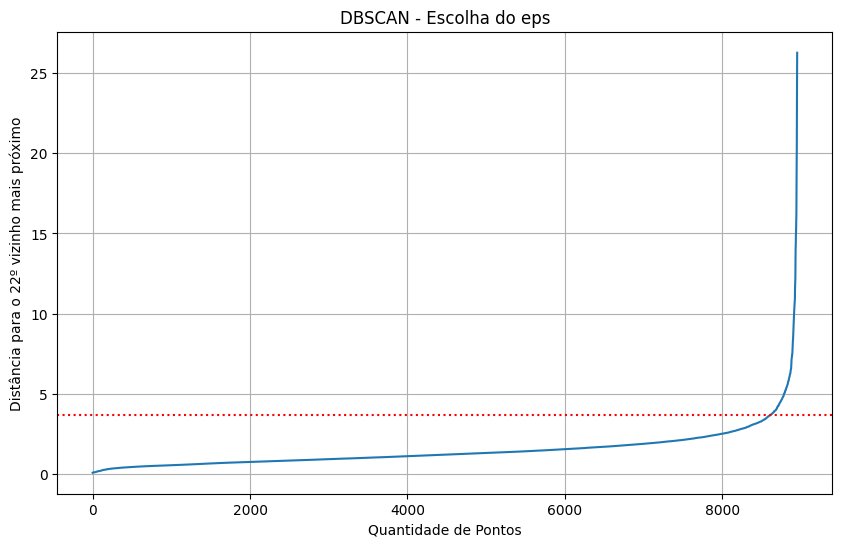

In [ ]:
# Calculando as distâncias para os vizinhos mais próximos
dbscan = DBSCAN(eps=None, min_samples=22)
neigh = NearestNeighbors(n_neighbors=dbscan.min_samples)
neigh.fit(df_features)
distances, _ = neigh.kneighbors()

# Ordenando as distâncias e plotando a curva do Método do Cotovelo
sorted_distances = sorted(distances[:, -1])
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_distances) + 1), sorted_distances)
plt.xlabel('Quantidade de Pontos')
plt.ylabel(f'Distância para o {dbscan.min_samples}º vizinho mais próximo')
plt.title('DBSCAN - Escolha do eps')
plt.grid(True)
plt.axhline(y=3.7, color='red', linestyle=':')
plt.show()


Baseado no gráfico acima, foi escolhido o valor de 3.7 para o eps

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np

# Lista de valores para min_samples
min_samples_list = [5,10,15,20,22,25,30]

for min_samples in min_samples_list:
    dbscan = DBSCAN(eps=3.7, min_samples=min_samples)  # Ajuste o eps conforme necessário
    labels = dbscan.fit_predict(df_features)

    # Calcule o Silhouette Score apenas se houver mais de 1 cluster
    if len(set(labels)) > 1:
        score = silhouette_score(df_features, labels)
        print(f'min_samples: {min_samples}, Silhouette Score: {score}')
    else:
        print(f'min_samples: {min_samples}, Não há clusters suficientes para cálculo do Silhouette Score')


min_samples: 5, Silhouette Score: 0.6877711513326856
min_samples: 10, Silhouette Score: 0.6779046908350762
min_samples: 15, Silhouette Score: 0.668260236441897
min_samples: 20, Silhouette Score: 0.6640589186510617
min_samples: 22, Silhouette Score: 0.6627910926519046
min_samples: 25, Silhouette Score: 0.6597001364366356
min_samples: 30, Silhouette Score: 0.6537808987855


Baseado nos valores de silhueta, foi escolhido o min_samples 22

In [ ]:
# Aplicando DBSCAN
dbscan = DBSCAN(eps=3.7, min_samples=22)
dbscan.fit(df_features)
clusters = dbscan.labels_
df_normalized['cluster_dbscan'] = clusters

In [ ]:
df_normalized.head(10)

,BALANCE,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,INSTALLMENTS_PURCHASES,MINIMUM_PAYMENTS,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,PAYMENTS,PRC_FULL_PAYMENT,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,TENURE,CUST_ID,cluster_dbscan
0,-0.731989,-0.249434,-0.466786,-0.675349,-0.476070,-0.960378,-0.349079,-0.302400,-0.356934,-0.678661,-0.528979,-0.525551,-0.424900,-0.806490,-0.707313,-0.511333,0.36068,C10001,0
1,0.786961,0.134325,2.605605,0.573963,0.110074,0.688678,-0.454576,0.097500,-0.356934,-0.678661,0.818642,0.234227,-0.469552,-1.221758,-0.916995,-0.591796,0.36068,C10002,0
2,0.447135,0.518084,-0.466786,-0.675349,-0.476070,0.826100,-0.454576,-0.093293,0.108889,2.673451,-0.383805,-0.525551,-0.107668,1.269843,-0.916995,-0.109020,0.36068,C10003,0
3,0.049099,-1.016953,-0.368653,-0.258913,-0.329534,0.826100,-0.454576,-0.228307,0.546189,-0.399319,-0.598688,-0.525551,0.232058,-1.014125,-0.916995,-0.551565,0.36068,C10004,0
4,-0.358775,0.518084,-0.466786,-0.675349,-0.476070,-0.905410,-0.454576,-0.257266,-0.347294,-0.399319,-0.364368,-0.525551,-0.462063,-1.014125,-0.916995,-0.551565,0.36068,C10005,0
5,0.117878,0.518084,-0.466786,-0.675349,-0.476070,-0.740504,1.019822,0.669767,-0.356934,-0.678661,-0.115060,-0.525551,0.154492,0.439310,0.550784,-0.269945,0.36068,C10006,0
6,-0.450277,0.518084,-0.466786,-0.675349,-0.476070,2.475157,0.306664,-0.277297,3.500548,2.673451,1.596313,2.893453,2.849408,1.269843,1.599199,1.983008,0.36068,C10007,0
7,0.124520,0.518084,-0.466786,-0.675349,-0.476070,-0.603083,0.027792,-0.134127,-0.356934,-0.678661,-0.364116,-0.525551,-0.265388,1.269843,1.599199,-0.109020,0.36068,C10008,0
8,-0.264026,0.518084,-0.466786,-0.675349,-0.476070,0.688678,-0.233408,-0.228470,0.041603,-0.399319,-0.360933,-0.525551,-0.066330,-0.391225,-0.287947,-0.390639,0.36068,C10009,0
9,-0.678504,-1.400712,-0.466786,-0.675349,-0.476070,1.788050,-0.454576,-0.319208,0.415209,-0.119974,-0.196336,-0.525551,0.130303,-0.806490,-0.916995,-0.471102,0.36068,C10010,0


In [ ]:
# Anomalia DBSCAN
# OBS: -1 indica anomalias (outliers)
print("Clusters pelo DBSCAN:")
print(df_normalized['cluster_dbscan'].value_counts())

Clusters pelo DBSCAN:
cluster_dbscan
 0    8788
-1     162
Name: count, dtype: int64


162 anomalias encontradas de um total de 8950 pontos avaliados

Ou seja, aproximadamente 1,81% de anomalias.

## Validação DBSCAN

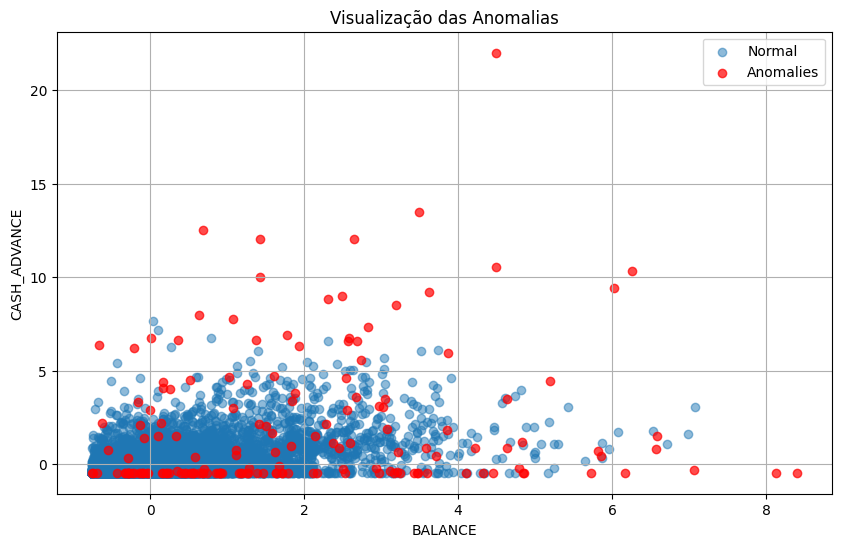

In [ ]:
# Plotagem dos dados normais e anômalos
normal_data = df_normalized[df_normalized['cluster_dbscan'] == 0]
anomaly_data = df_normalized[df_normalized['cluster_dbscan'] == -1]

# Plotagem dos dados normais e anômalos
plt.figure(figsize=(10, 6))
plt.scatter(normal_data['BALANCE'], normal_data['CASH_ADVANCE'], label='Normal', alpha=0.5)
plt.scatter(anomaly_data['BALANCE'], anomaly_data['CASH_ADVANCE'], label='Anomalies', color='red', alpha=0.7)
plt.xlabel('BALANCE')
plt.ylabel('CASH_ADVANCE')
plt.title('Visualização das Anomalias')
plt.legend()
plt.grid(True)
plt.show()

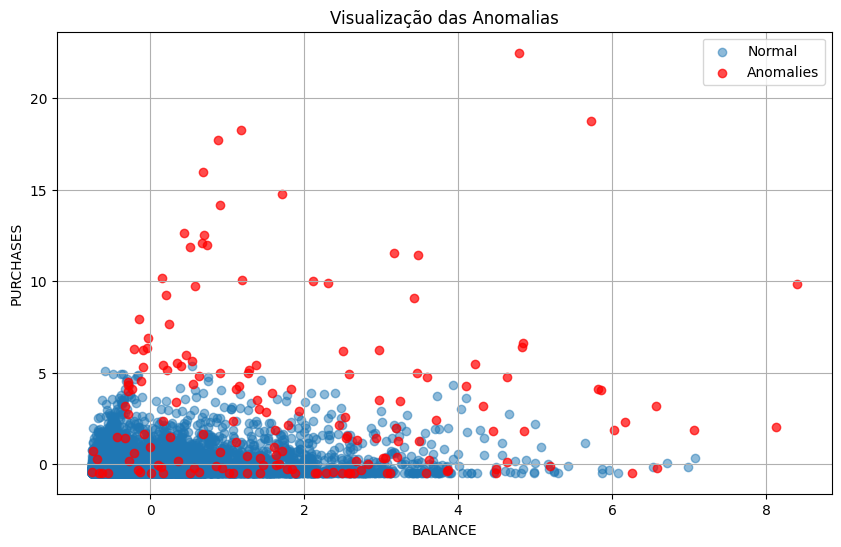

In [ ]:
# Plotagem dos dados normais e anômalos
normal_data = df_normalized[df_normalized['cluster_dbscan'] == 0]
anomaly_data = df_normalized[df_normalized['cluster_dbscan'] == -1]

# Plotagem dos dados normais e anômalos
plt.figure(figsize=(10, 6))
plt.scatter(normal_data['BALANCE'], normal_data['PURCHASES'], label='Normal', alpha=0.5)
plt.scatter(anomaly_data['BALANCE'], anomaly_data['PURCHASES'], label='Anomalies', color='red', alpha=0.7)
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.title('Visualização das Anomalias')
plt.legend()
plt.grid(True)
plt.show()

## Isolation Forest

In [ ]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   CASH_ADVANCE                      8950 non-null   float64
 3   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 4   CASH_ADVANCE_TRX                  8950 non-null   float64
 5   CREDIT_LIMIT                      8950 non-null   float64
 6   INSTALLMENTS_PURCHASES            8950 non-null   float64
 7   MINIMUM_PAYMENTS                  8950 non-null   float64
 8   ONEOFF_PURCHASES                  8950 non-null   float64
 9   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 10  PAYMENTS                          8950 non-null   float64
 11  PRC_FULL_PAYMENT                  8950 non-null   float64
 12  PURCHA

Abaixo, testarei diveros valores para contamination

Contamination: 0.01
Número de anomalias detectadas: 29
Contamination: 0.015
Número de anomalias detectadas: 39
Contamination: 0.018
Número de anomalias detectadas: 47
Contamination: 0.02
Número de anomalias detectadas: 55


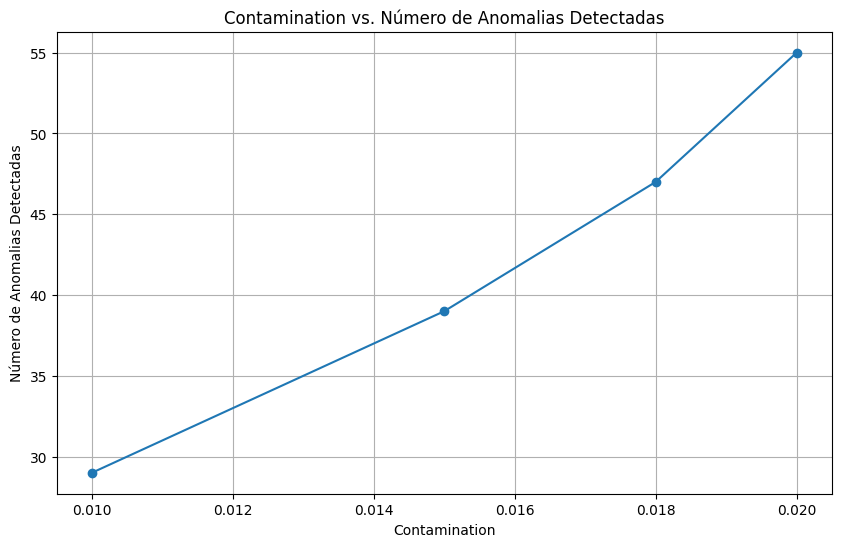

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Dividindo o dataframe em treino e teste
X_train, X_test = train_test_split(df_features, test_size=0.3, random_state=42)

# Definindo os valores de contaminação para testar
contamination_values = [0.01, 0.015, 0.018, 0.02]

results = []

for contamination in contamination_values:
    # Criando e treinando o modelo
    model = IsolationForest(contamination=contamination, random_state=42)
    model.fit(X_train)

    # Fazejdo previsões no conjunto de teste
    y_pred = model.predict(X_test)

    # Calculando a quantidade de anomalias detectadas
    num_anomalies = np.sum(y_pred == -1)

    # Armazenando os resultados
    results.append((contamination, num_anomalies))

    print(f'Contamination: {contamination}')
    print(f'Número de anomalias detectadas: {num_anomalies}')

contaminations, anomalies = zip(*results)
plt.figure(figsize=(10, 6))
plt.plot(contaminations, anomalies, marker='o')
plt.xlabel('Contamination')
plt.ylabel('Número de Anomalias Detectadas')
plt.title('Contamination vs. Número de Anomalias Detectadas')
plt.grid(True)
plt.show()


Baseado no percentual de anomalias encontrado no DBSCAN (1.81%) foi escolhido o valor de 0.018

In [ ]:
# Aplicando Isoaltion Fortest
iso_forest = IsolationForest(contamination=0.018, random_state=42)
iso_forest.fit(df_features)
anomalies = iso_forest.predict(df_features)
df_normalized['anomaly_if'] = anomalies

In [ ]:
# Anomalia Isolation Forest
# -1 indica anomalias, 1 indica normal
print("Anomalias pelo Isolation Forest:")
print(df_normalized['anomaly_if'].value_counts())

Anomalias pelo Isolation Forest:
anomaly_if
 1    8788
-1     162
Name: count, dtype: int64


Como ambos os valores foram iguais, é considerável que os valores de eps, min_samples e contamination estão bem ajustados.

In [ ]:
df_normalized.head(5)

,BALANCE,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,INSTALLMENTS_PURCHASES,MINIMUM_PAYMENTS,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,PAYMENTS,PRC_FULL_PAYMENT,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,TENURE,CUST_ID,cluster_dbscan,anomaly_if
0,-0.731989,-0.249434,-0.466786,-0.675349,-0.476070,-0.960378,-0.349079,-0.302400,-0.356934,-0.678661,-0.528979,-0.525551,-0.424900,-0.806490,-0.707313,-0.511333,0.36068,C10001,0,1
1,0.786961,0.134325,2.605605,0.573963,0.110074,0.688678,-0.454576,0.097500,-0.356934,-0.678661,0.818642,0.234227,-0.469552,-1.221758,-0.916995,-0.591796,0.36068,C10002,0,1
2,0.447135,0.518084,-0.466786,-0.675349,-0.476070,0.826100,-0.454576,-0.093293,0.108889,2.673451,-0.383805,-0.525551,-0.107668,1.269843,-0.916995,-0.109020,0.36068,C10003,0,1
3,0.049099,-1.016953,-0.368653,-0.258913,-0.329534,0.826100,-0.454576,-0.228307,0.546189,-0.399319,-0.598688,-0.525551,0.232058,-1.014125,-0.916995,-0.551565,0.36068,C10004,0,1
4,-0.358775,0.518084,-0.466786,-0.675349,-0.476070,-0.905410,-0.454576,-0.257266,-0.347294,-0.399319,-0.364368,-0.525551,-0.462063,-1.014125,-0.916995,-0.551565,0.36068,C10005,0,1


## Validação Isolation

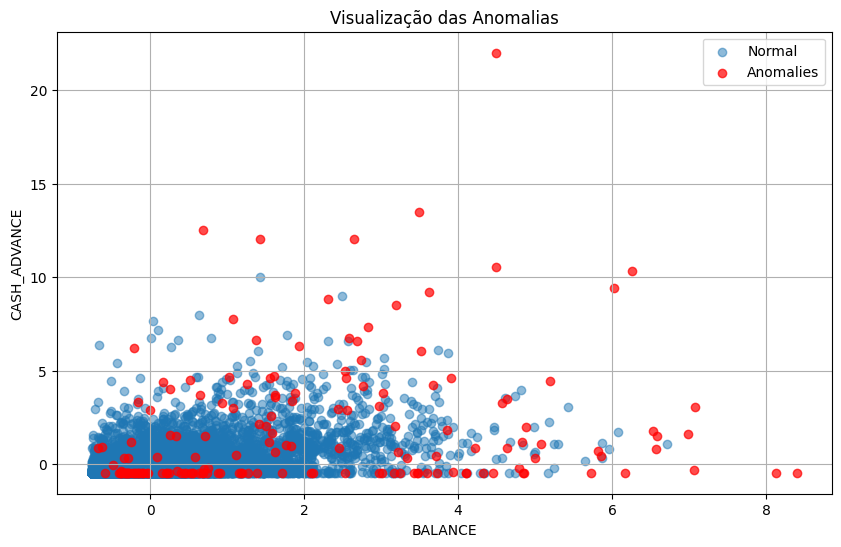

In [ ]:
# Plotagem dos dados normais e anômalos
normal_data = df_normalized[df_normalized['anomaly_if'] == 1]
anomaly_data = df_normalized[df_normalized['anomaly_if'] == -1]

# Plotagem dos dados normais e anômalos
plt.figure(figsize=(10, 6))
plt.scatter(normal_data['BALANCE'], normal_data['CASH_ADVANCE'], label='Normal', alpha=0.5)
plt.scatter(anomaly_data['BALANCE'], anomaly_data['CASH_ADVANCE'], label='Anomalies', color='red', alpha=0.7)
plt.xlabel('BALANCE')
plt.ylabel('CASH_ADVANCE')
plt.title('Visualização das Anomalias')
plt.legend()
plt.grid(True)
plt.show()


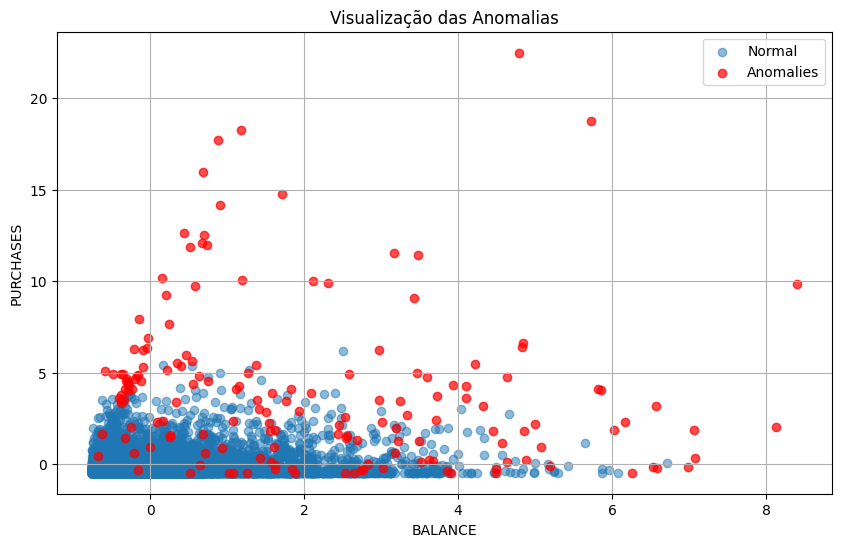

In [ ]:
# Plotagem dos dados normais e anômalos
normal_data = df_normalized[df_normalized['anomaly_if'] == 1]
anomaly_data = df_normalized[df_normalized['anomaly_if'] == -1]

# Plotagem dos dados normais e anômalos
plt.figure(figsize=(10, 6))
plt.scatter(normal_data['BALANCE'], normal_data['PURCHASES'], label='Normal', alpha=0.5)
plt.scatter(anomaly_data['BALANCE'], anomaly_data['PURCHASES'], label='Anomalies', color='red', alpha=0.7)
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.title('Visualização das Anomalias')
plt.legend()
plt.grid(True)
plt.show()


# PCA

Quis testar como ficava fazendo o PCA antes

In [ ]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   CASH_ADVANCE                      8950 non-null   float64
 3   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 4   CASH_ADVANCE_TRX                  8950 non-null   float64
 5   CREDIT_LIMIT                      8950 non-null   float64
 6   INSTALLMENTS_PURCHASES            8950 non-null   float64
 7   MINIMUM_PAYMENTS                  8950 non-null   float64
 8   ONEOFF_PURCHASES                  8950 non-null   float64
 9   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 10  PAYMENTS                          8950 non-null   float64
 11  PRC_FULL_PAYMENT                  8950 non-null   float64
 12  PURCHA

In [ ]:
# Preparando os dados
X = df_normalized.drop(['CUST_ID', 'cluster_dbscan', 'anomaly_if'], axis=1)
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
# Aplicando PCA
pca = PCA(n_components=2)  # Reduzir para 2 componentes principais para visualização
X_pca = pca.fit_transform(X_scaled)

Para Isolation Forest e DBSCAN, utilizei os mesmos valores para os sem PCA

In [ ]:
# Aplicando Isolation Forest
iso_forest = IsolationForest(contamination=0.018, random_state=42)
anomalies_if = iso_forest.fit_predict(X_pca)
df_normalized['anomaly_if'] = anomalies_if

In [ ]:
# Aplicando DBSCAN
dbscan = DBSCAN(eps=3.7, min_samples=22)
clusters_dbscan = dbscan.fit_predict(X_pca)
df_normalized['cluster_dbscan'] = clusters_dbscan

Text(0, 0.5, 'Componente Principal 2')

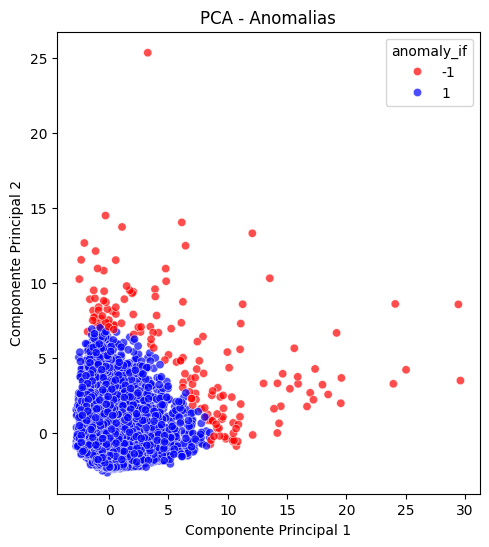

In [ ]:
# Visualizar os resultados
plt.figure(figsize=(12, 6))

# PCA Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_normalized['anomaly_if'], palette={1: 'blue', -1: 'red'}, alpha=0.7)
plt.title('PCA - Anomalias')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

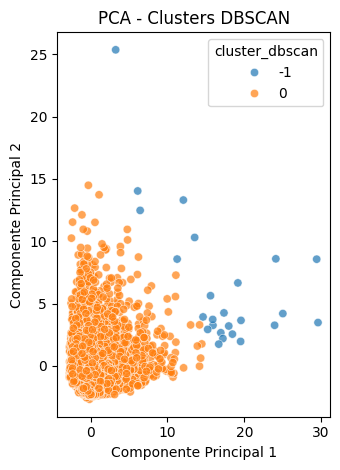

In [ ]:
# DBSCAN Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_normalized['cluster_dbscan'], palette='tab10', alpha=0.7)
plt.title('PCA - Clusters DBSCAN')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.tight_layout()
plt.show()

In [ ]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   CASH_ADVANCE                      8950 non-null   float64
 3   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 4   CASH_ADVANCE_TRX                  8950 non-null   float64
 5   CREDIT_LIMIT                      8950 non-null   float64
 6   INSTALLMENTS_PURCHASES            8950 non-null   float64
 7   MINIMUM_PAYMENTS                  8950 non-null   float64
 8   ONEOFF_PURCHASES                  8950 non-null   float64
 9   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 10  PAYMENTS                          8950 non-null   float64
 11  PRC_FULL_PAYMENT                  8950 non-null   float64
 12  PURCHA

In [ ]:
# Contar o número de anomalias detectadas pelo Isolation Forest
anomalias_if = df_normalized['anomaly_if'].value_counts()
print("Número de anomalias detectadas pelo Isolation Forest:")
print(anomalias_if)

Número de anomalias detectadas pelo Isolation Forest:
anomaly_if
 1    8788
-1     162
Name: count, dtype: int64


In [ ]:
# Contar o número de anomalias detectadas pelo DBSCAN
anomalias_dbscan = df_normalized['cluster_dbscan'].value_counts()
print("Número de anomalias detectadas pelo DBSCAN:")
print(anomalias_dbscan)

Número de anomalias detectadas pelo DBSCAN:
cluster_dbscan
 0    8925
-1      25
Name: count, dtype: int64


O Isolation Forest não foi alterado.

Porém o DBSCAN foi alterado, diminuindo a quantidade de anomalias.

## Validação PCA DBSCAN

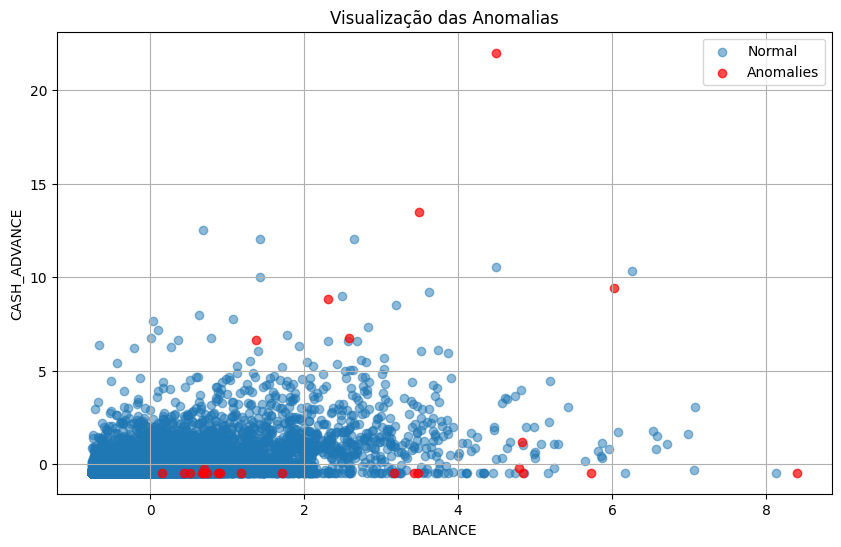

In [ ]:
# Plotagem dos dados normais e anômalos
normal_data = df_normalized[df_normalized['cluster_dbscan'] == 0]
anomaly_data = df_normalized[df_normalized['cluster_dbscan'] == -1]

# Plotagem dos dados normais e anômalos
plt.figure(figsize=(10, 6))
plt.scatter(normal_data['BALANCE'], normal_data['CASH_ADVANCE'], label='Normal', alpha=0.5)
plt.scatter(anomaly_data['BALANCE'], anomaly_data['CASH_ADVANCE'], label='Anomalies', color='red', alpha=0.7)
plt.xlabel('BALANCE')
plt.ylabel('CASH_ADVANCE')
plt.title('Visualização das Anomalias')
plt.legend()
plt.grid(True)
plt.show()

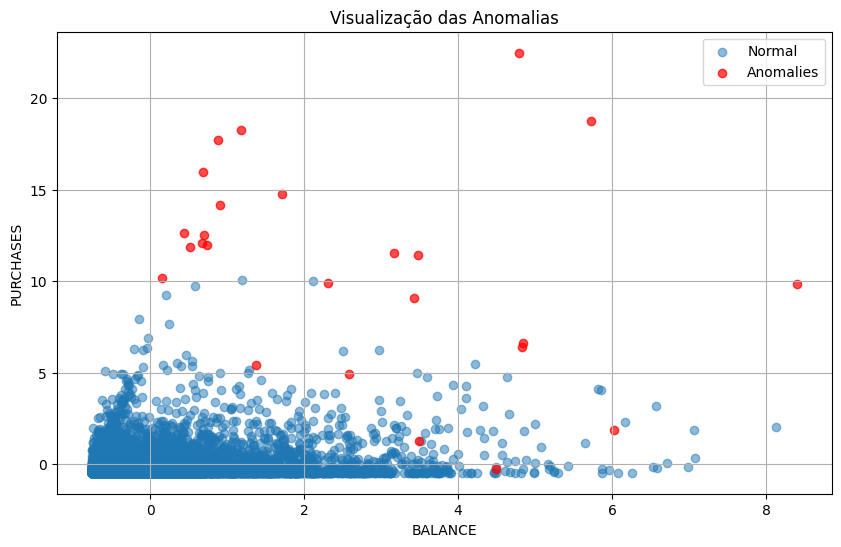

In [ ]:
# Plotagem dos dados normais e anômalos
normal_data = df_normalized[df_normalized['cluster_dbscan'] == 0]
anomaly_data = df_normalized[df_normalized['cluster_dbscan'] == -1]

# Plotagem dos dados normais e anômalos
plt.figure(figsize=(10, 6))
plt.scatter(normal_data['BALANCE'], normal_data['PURCHASES'], label='Normal', alpha=0.5)
plt.scatter(anomaly_data['BALANCE'], anomaly_data['PURCHASES'], label='Anomalies', color='red', alpha=0.7)
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.title('Visualização das Anomalias')
plt.legend()
plt.grid(True)
plt.show()

## Validação PCA Isolation

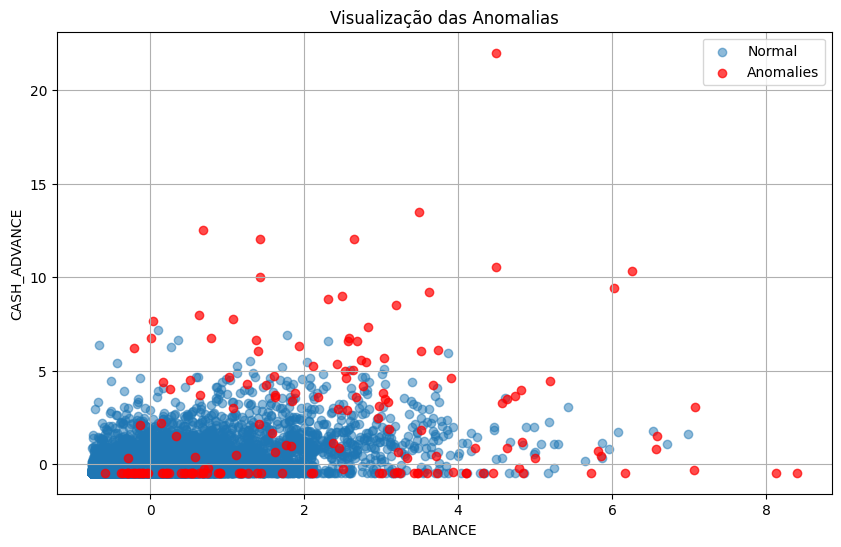

In [ ]:
# Plotagem dos dados normais e anômalos
normal_data = df_normalized[df_normalized['anomaly_if'] == 1]
anomaly_data = df_normalized[df_normalized['anomaly_if'] == -1]

# Plotagem dos dados normais e anômalos
plt.figure(figsize=(10, 6))
plt.scatter(normal_data['BALANCE'], normal_data['CASH_ADVANCE'], label='Normal', alpha=0.5)
plt.scatter(anomaly_data['BALANCE'], anomaly_data['CASH_ADVANCE'], label='Anomalies', color='red', alpha=0.7)
plt.xlabel('BALANCE')
plt.ylabel('CASH_ADVANCE')
plt.title('Visualização das Anomalias')
plt.legend()
plt.grid(True)
plt.show()


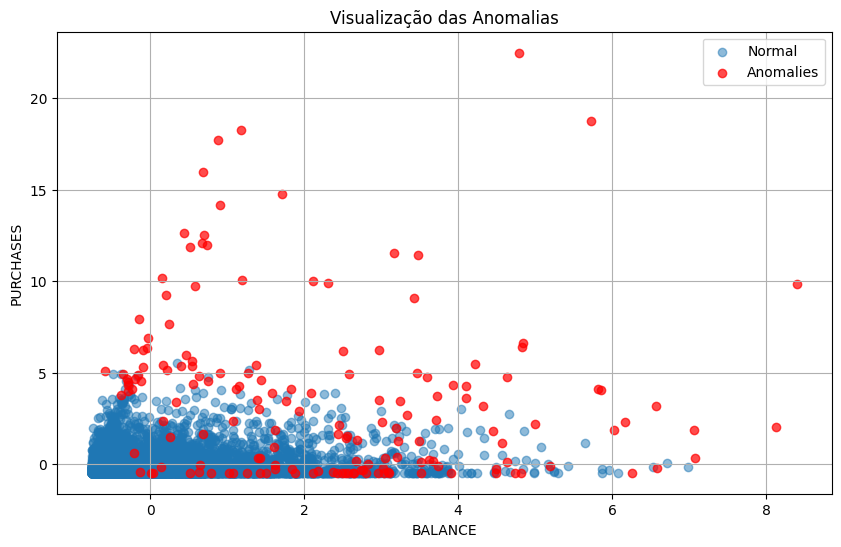

In [ ]:
# Plotagem dos dados normais e anômalos
normal_data = df_normalized[df_normalized['anomaly_if'] == 1]
anomaly_data = df_normalized[df_normalized['anomaly_if'] == -1]

# Plotagem dos dados normais e anômalos
plt.figure(figsize=(10, 6))
plt.scatter(normal_data['BALANCE'], normal_data['PURCHASES'], label='Normal', alpha=0.5)
plt.scatter(anomaly_data['BALANCE'], anomaly_data['PURCHASES'], label='Anomalies', color='red', alpha=0.7)
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.title('Visualização das Anomalias')
plt.legend()
plt.grid(True)
plt.show()
